In [1]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/longitudinal-verlet/"
REPEAT = 2

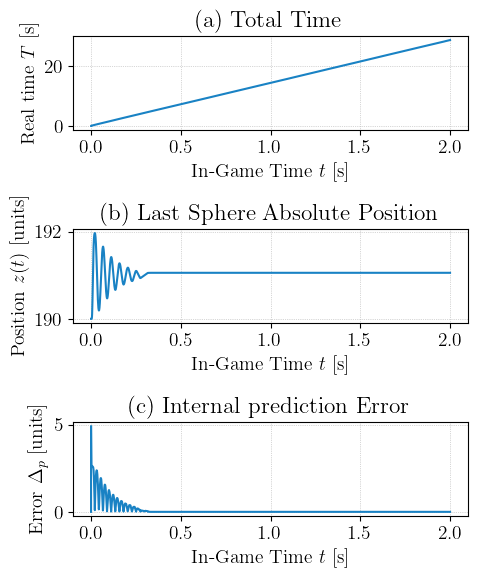

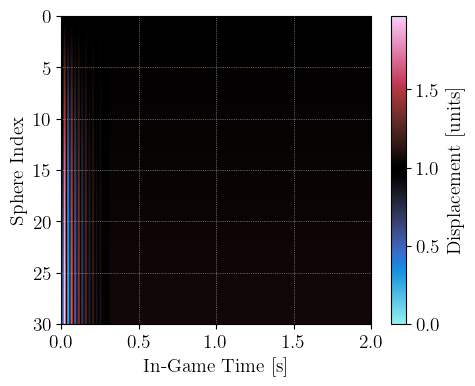

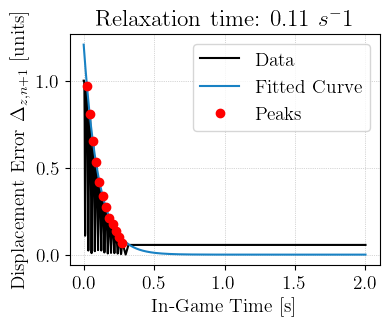

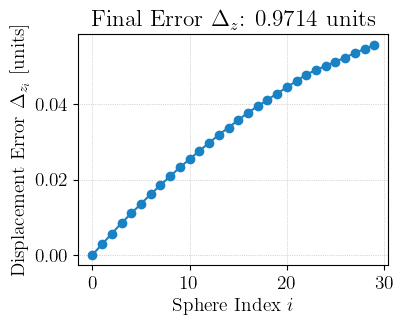

In [3]:
positions = read_json_file("/home/max/Temp/Praktikum/longitudinal-verlet/constraint_solver_steps_0/constraint_solver_steps_0_1000/positions.json")

experiment1 = GuidewireExperiment(positions)

experiment1.plot_experiment(axis=2)
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/experiment1.pdf", bbox_inches="tight", dpi=300)
plt.show()
experiment1.plot_all_spheres(axis=2)
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/experiment1_2.pdf", bbox_inches="tight", dpi=300)
plt.show()
_ = get_decay_rate(experiment1, [1,1], debug=True, offset=1, save=True)

# Constraint Solver Steps

In [4]:
constraint_solver_steps = np.arange(100,1100,100)

relaxation_times, offsets, loop_times, errors, params = get_all_data("constraint_solver_steps", constraint_solver_steps, debug=False)


(2, 10)


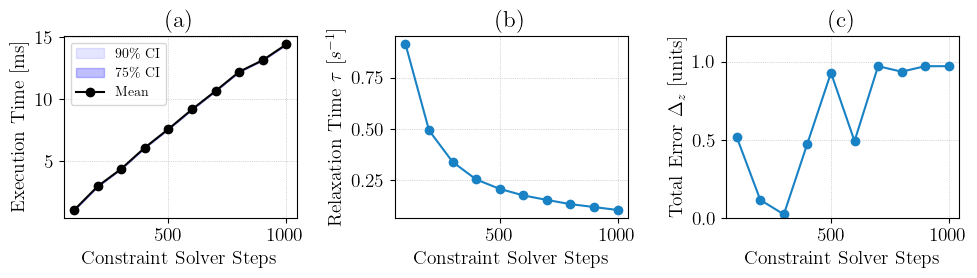

In [5]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

print(loop_times.shape)

plot_confidence_interval(ax[0], constraint_solver_steps, loop_times, "Constraint Solver Steps", "Execution Time [ms]")
#ax[0].plot(constraint_solver_steps, loop_times[0], "o-")
# ax[0].set_xlabel("Constraint Solver Steps")
# ax[0].set_ylabel("Execution Time [s]")
ax[0].set_title("(a)")


ax[1].plot(constraint_solver_steps, relaxation_times[0], "o-")
ax[1].set_xlabel("Constraint Solver Steps")
ax[1].set_ylabel("Relaxation Time $\\tau$ [$s^{-1}$]")
#ax[1].set_yscale("log")
#ax[1].set_ylim(1e-4, 1e-2)
ax[1].set_title("(b)")

ax[2].plot(constraint_solver_steps, errors[0], "o-")
ax[2].set_xlabel("Constraint Solver Steps")
ax[2].set_ylabel("Total Error $\Delta_z$ [units]")
ax[2].set_ylim(0, errors[0].max()*1.2)
ax[2].set_title("(c)")
#ax[2].set_yscale("log")
#ax[2].hlines(1,100,1000, color="darkgray", linestyle="--", label="Expected Offset")
#ax[2].set_ylim(0.1,1.1)
#ax[2].legend()

plt.tight_layout()

plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/constraint_solver_steps.png", dpi=300, bbox_inches="tight")
plt.show()

# Time steps

In [10]:
timesteps = np.logspace(-4, 0, 10)

relaxation_times, offsets, loop_times, errors, params = get_all_data("time_steps", timesteps, debug=False)

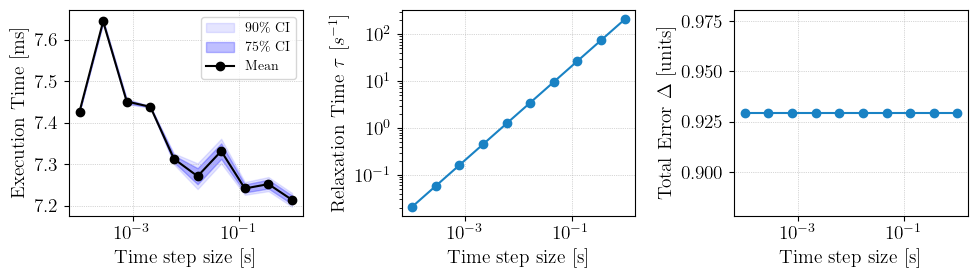

In [11]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
plot_confidence_interval(ax[0], timesteps, loop_times, "Time step size [s]", "Execution Time [ms]")
ax[0].set_xscale("log")
#ax[0].set_yscale("log")
#plot_data(timesteps, loop_times[0], "Time steps [s]", "Relaxation Time [s]")
#plt.xscale("log")
#plt.yscale("log")

ax[1].plot(timesteps, relaxation_times[0], "o-")
ax[1].set_xlabel("Time step size [s]")
ax[1].set_ylabel("Relaxation Time $\\tau$ [$s^{-1}$]")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

ax[2].plot(timesteps, errors[0], "o-")
ax[2].set_xlabel("Time step size [s]")
ax[2].set_ylabel("Total Error $\Delta$ [units]")
ax[2].set_xscale("log")
#ax[2].hlines(1,1e-4,1, color="darkgray", linestyle="--", label="Expected Offset")

plt.tight_layout()
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/time_steps_total_time.png", dpi=300, bbox_inches="tight")
plt.show()

# Rod Element Length

In [12]:

elements = np.arange(5,20,1).astype("float")[1:]

relaxation_times, offsets, loop_times, errors, params = get_all_data("rod_elements", elements, debug=False)

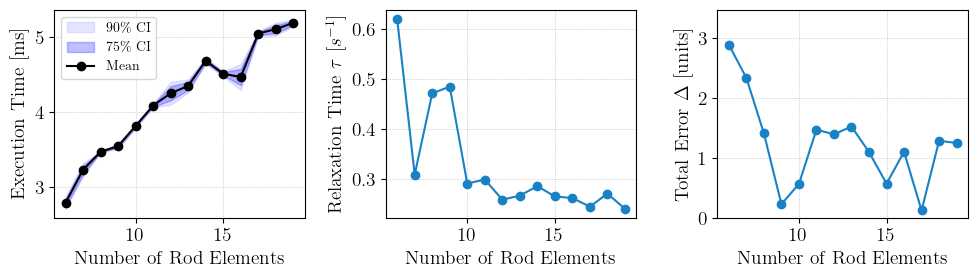

In [13]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

plot_confidence_interval(ax[0], elements, loop_times, "Number of Rod Elements", "Execution Time [ms]")
# ax[0].plot(elements, loop_times[0], "o-")
# ax[0].set_xlabel("Number of Rod Elements")
# ax[0].set_ylabel("Average Execution Time [s]")

ax[1].plot(elements, relaxation_times[0], "o-")
ax[1].set_xlabel("Number of Rod Elements")
ax[1].set_ylabel("Relaxation Time $\\tau$ [$s^{-1}$]")
# ax[1].set_yscale("log")
# ax[1].set_ylim(1e-4, 1e-2)

ax[2].plot(elements, errors[0], "o-")
ax[2].set_xlabel("Number of Rod Elements")
ax[2].set_ylabel("Total Error $\Delta$ [units]")
ax[2].set_ylim(0, errors[0].max()*1.2)
#ax[2].set_yscale("log")
#ax[2].hlines(1,5, 20, color="darkgray", linestyle="--", label="Expected Offset")
#ax[2].set_ylim(0.1,1.1)
#ax[2].legend()

plt.tight_layout()

plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/rod_elements.png", dpi=300, bbox_inches="tight")
plt.show()

# Displacement

In [14]:

displacements = np.linspace(0.1,5, 20)[3:]

relaxation_times, offsets, loop_times, errors, params = get_all_data("displacemen", displacements, debug=False)

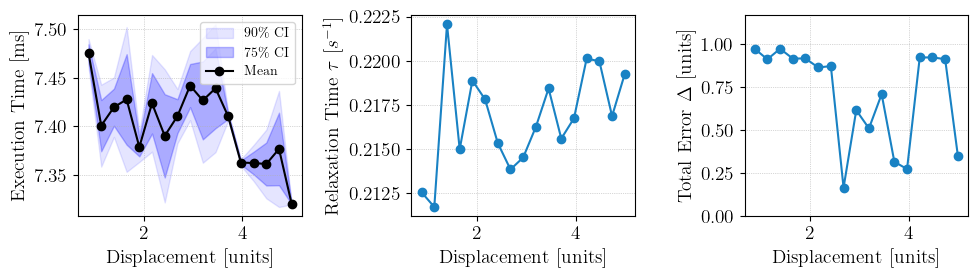

In [15]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

plot_confidence_interval(ax[0], displacements, loop_times, "Displacement [units]", "Execution Time [ms]")
# ax[0].plot(displacements, loop_times[0], "o-")
# ax[0].set_xlabel("Displacement [m]")
# ax[0].set_ylabel("Average Execution Time [s]")

ax[1].plot(displacements, relaxation_times[0], "o-")
ax[1].set_xlabel("Displacement [units]")
ax[1].set_ylabel("Relaxation Time $\\tau$ [$s^{-1}$]")
#ax[1].set_yscale("log")
#ax[1].set_ylim(1e-4, 1e-2)

ax[2].plot(displacements, errors[0], "o-")
ax[2].set_xlabel("Displacement [units]")
ax[2].set_ylabel("Total Error $\Delta$ [units]")
ax[2].set_ylim(0, errors[0].max()*1.2)
#ax[2].set_yscale("log")
#ax[2].hlines(1,100,1000, color="darkgray", linestyle="--", label="Expected Offset")
#ax[2].set_ylim(0.1,1.1)
#ax[2].legend()

plt.tight_layout()

plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/displacements.png", dpi=300, bbox_inches="tight")
plt.show()

# Transversal

In [7]:
PATH = "/home/max/Temp/Praktikum/transversal-verlet/"

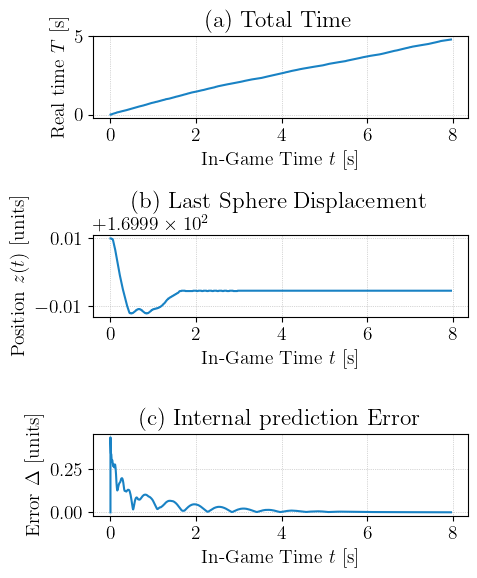

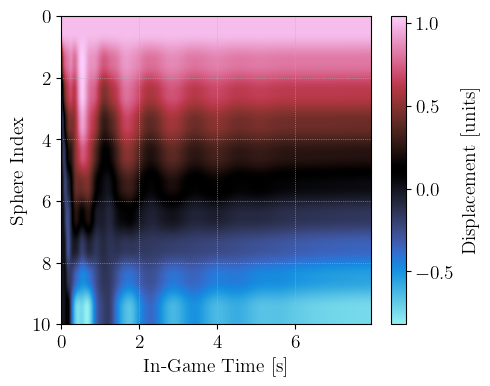

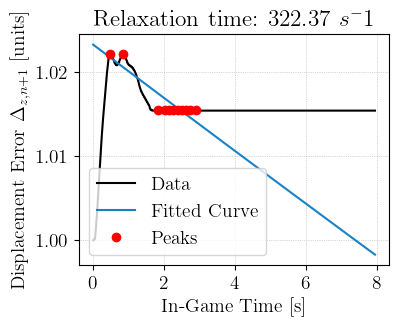

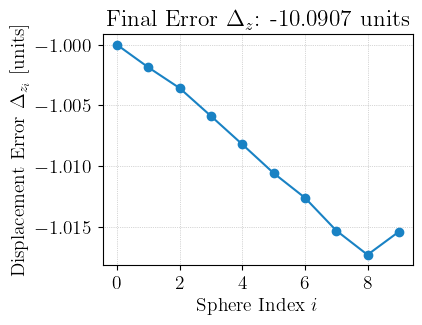

In [10]:
positions = read_json_file(PATH + "constraint_solver_steps_0/constraint_solver_steps_0_1000/positions.json")

experiment1 = GuidewireExperiment(positions)

experiment1.plot_experiment(axis=2)
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/experiment1.pdf", bbox_inches="tight", dpi=300)
plt.show()
experiment1.plot_all_spheres(axis=1)
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/experiment1_2.pdf", bbox_inches="tight", dpi=300)
plt.show()
_ = get_decay_rate(experiment1, [1,1], debug=True, offset=1, save=True)

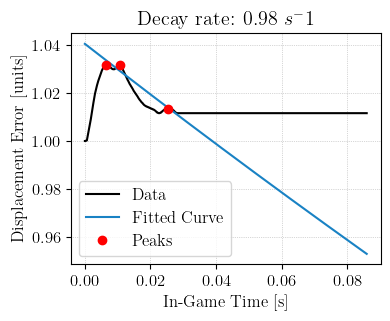

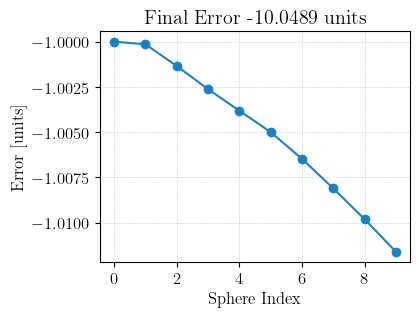

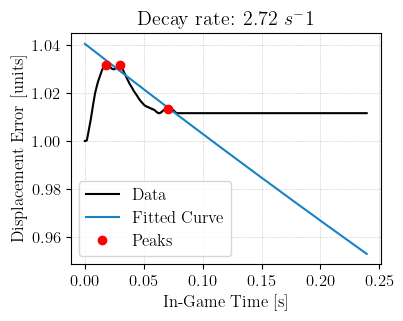

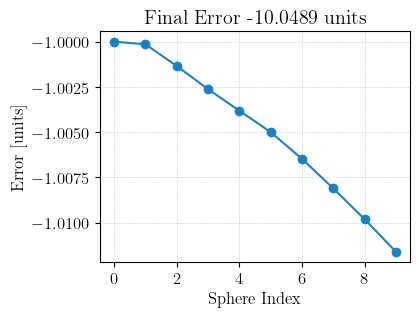

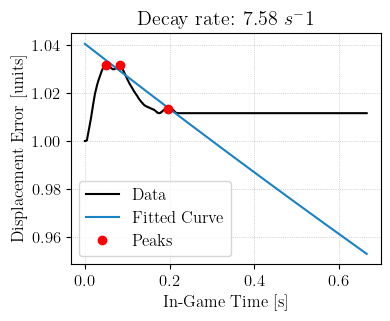

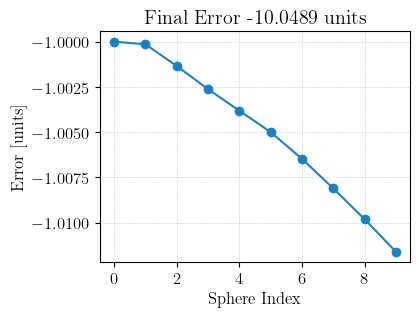

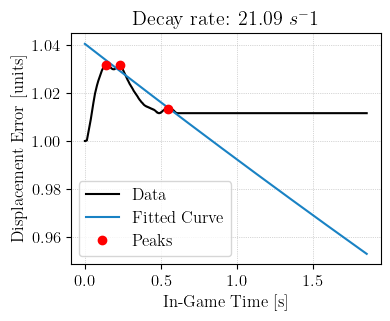

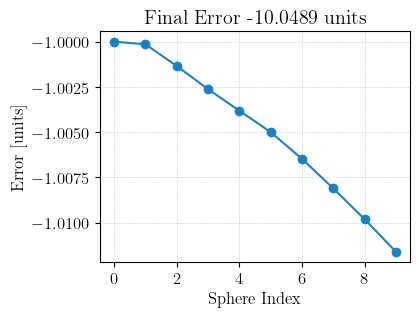

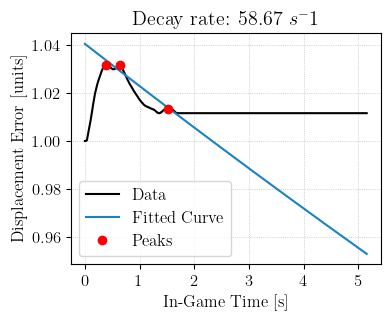

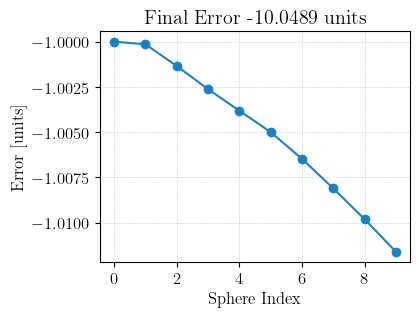

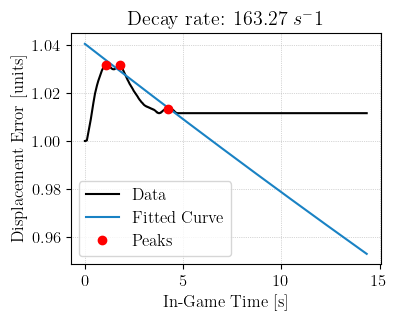

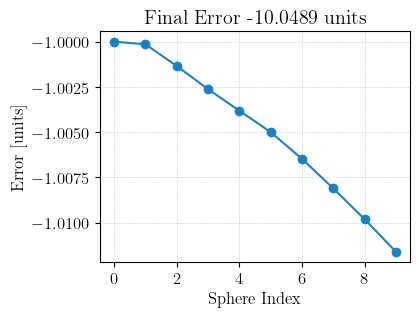

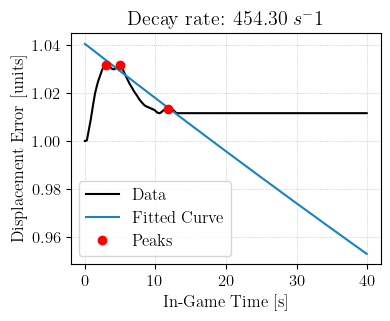

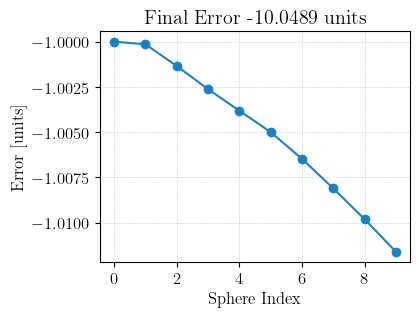

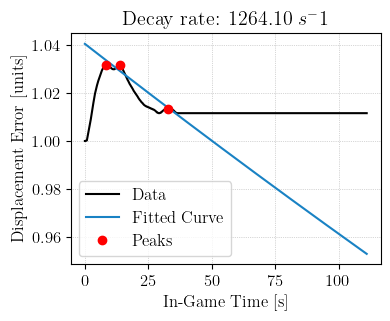

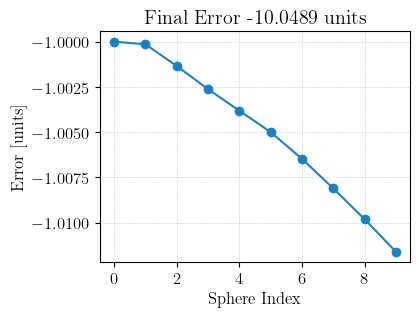

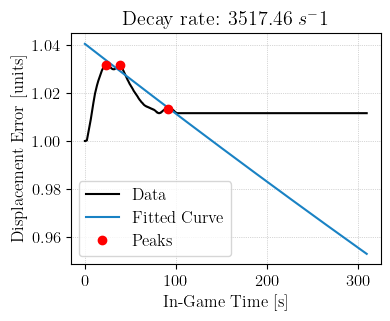

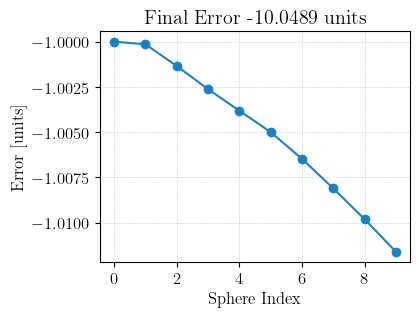

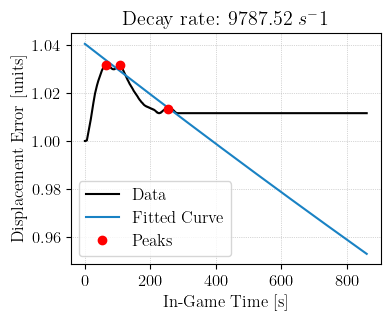

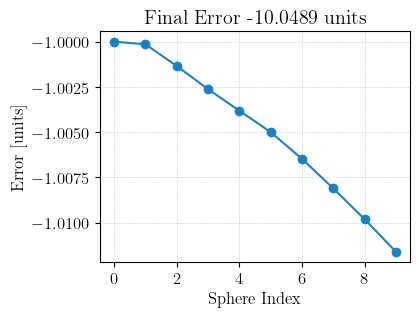

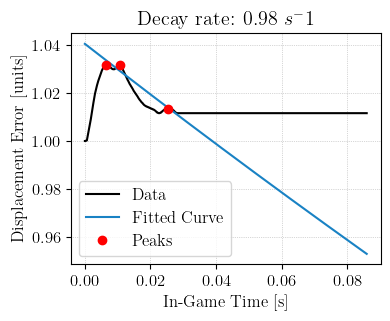

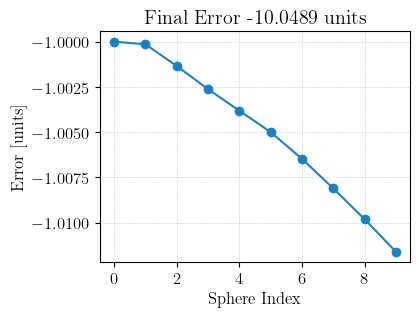

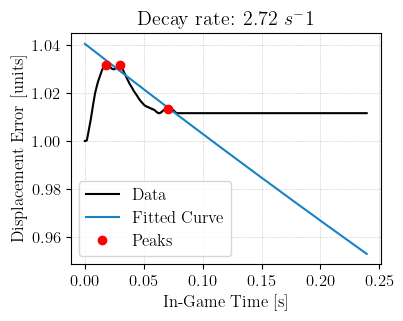

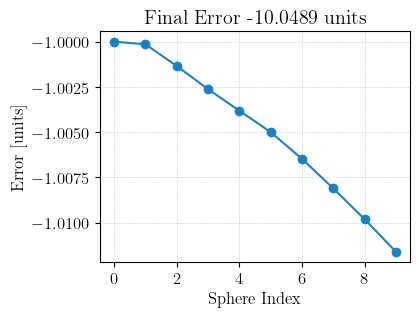

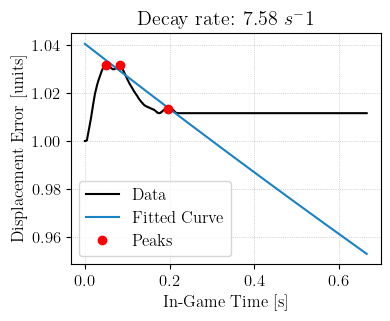

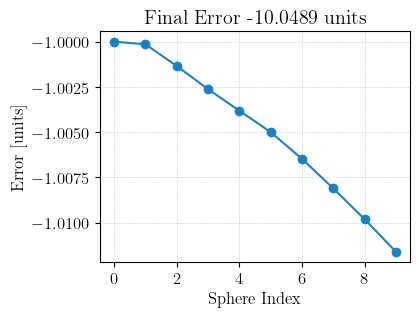

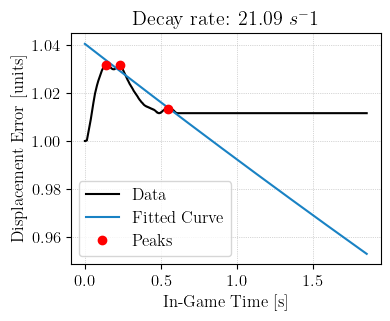

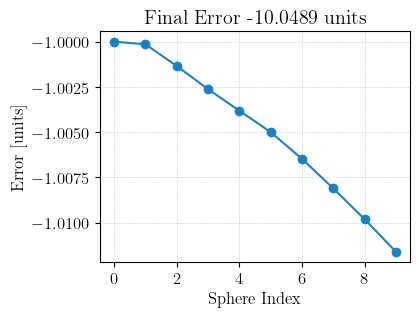

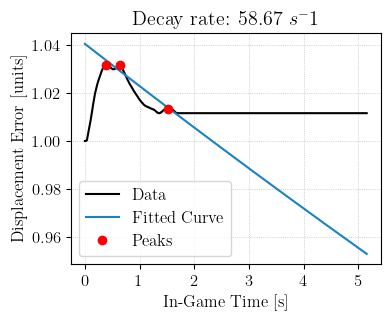

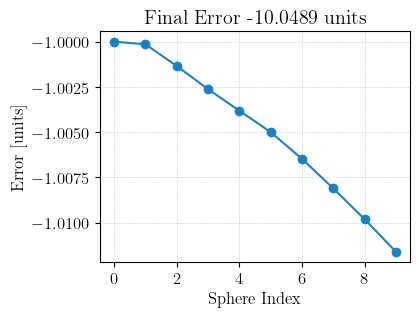

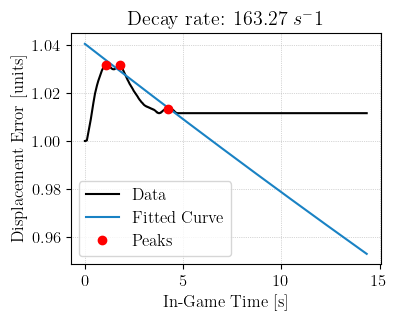

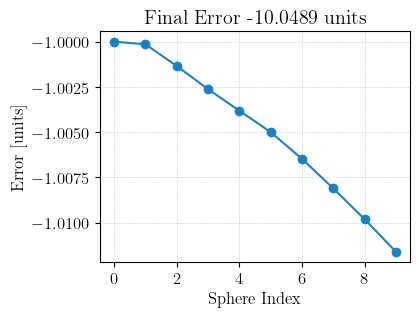

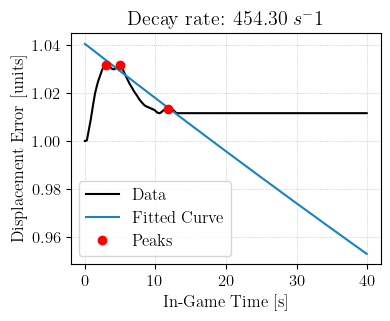

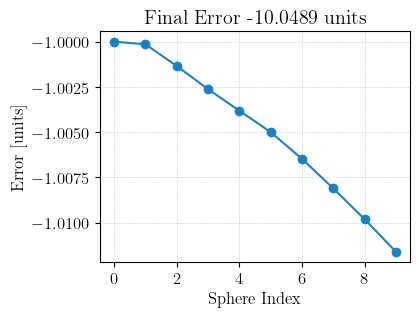

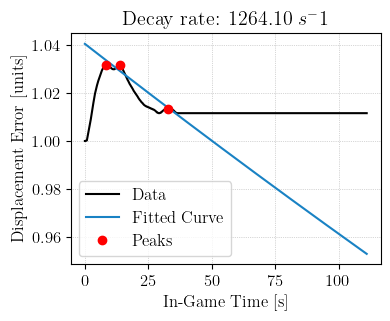

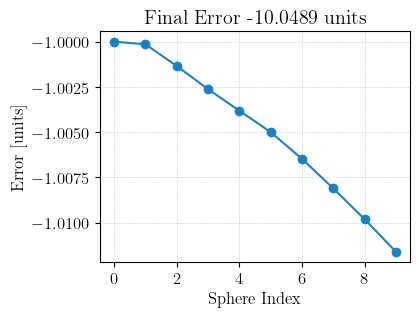

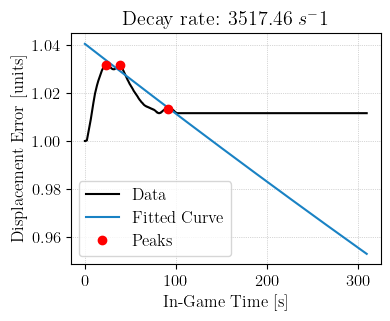

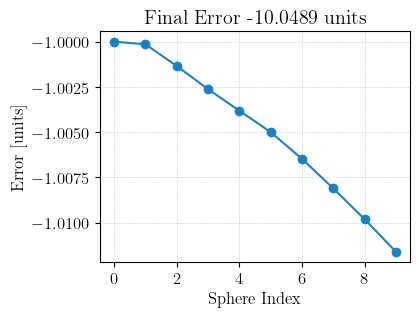

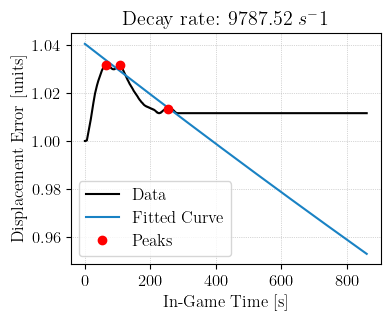

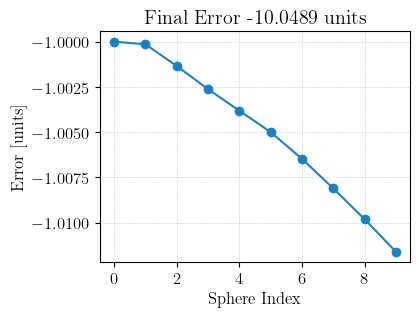

In [33]:
timesteps = np.logspace(-4, 0, 10)

relaxation_times, offsets, loop_times, errors, params = get_all_data("time_steps", timesteps, debug=True)

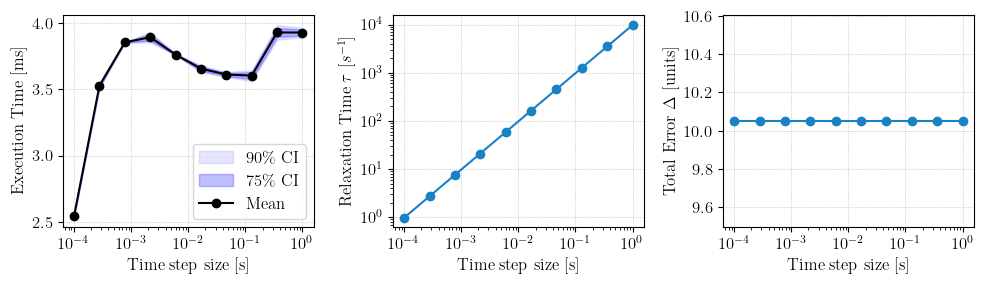

In [32]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
plot_confidence_interval(ax[0], timesteps, loop_times, "Time step size [s]", "Execution Time [ms]")
ax[0].set_xscale("log")
#ax[0].set_yscale("log")
#plot_data(timesteps, loop_times[0], "Time steps [s]", "Relaxation Time [s]")
#plt.xscale("log")
#plt.yscale("log")

ax[1].plot(timesteps, relaxation_times[0], "o-")
ax[1].set_xlabel("Time step size [s]")
ax[1].set_ylabel("Relaxation Time $\\tau$ [$s^{-1}$]")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

ax[2].plot(timesteps, errors[0], "o-")
ax[2].set_xlabel("Time step size [s]")
ax[2].set_ylabel("Total Error $\Delta$ [units]")
ax[2].set_xscale("log")
#ax[2].hlines(1,1e-4,1, color="darkgray", linestyle="--", label="Expected Offset")

plt.tight_layout()
plt.savefig("/home/max/Nextcloud/Praktikum/Report/figures/transversal_rod_elements.png", dpi=300, bbox_inches="tight")
plt.show()

Text(0.5, 1.0, 'Relaxation Time: -74978.50466')

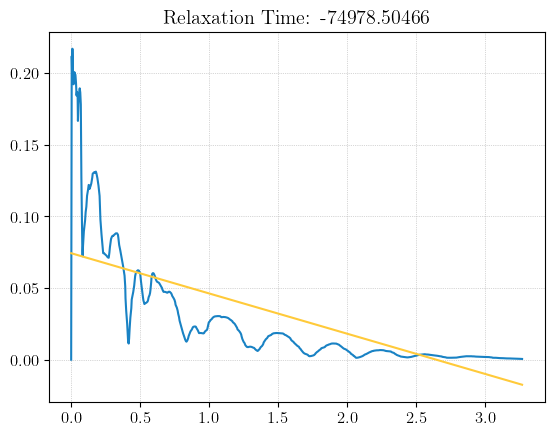

In [19]:
delta = experiment1.get_delta()
time = experiment1.get_elapsed_time()/1000

plt.plot(time, delta)

def func(x, a, b,c):
    return a*np.exp(-x/b)+c

popt, pcov = curve_fit(func, time, delta, p0=[2, 10,0])

plt.plot(time, func(time, *popt))
#plt.yscale("log")
plt.title(f"Relaxation Time: {popt[1]:.5f}")

In [17]:
print(experiment1.timesteps)

5935
